# Visualizing Chipotle's Data

### Step 1. Import the necessary libraries

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [101]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [102]:
chipo_df = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [103]:
chipo_df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


Text(0, 0.5, 'Frequency')

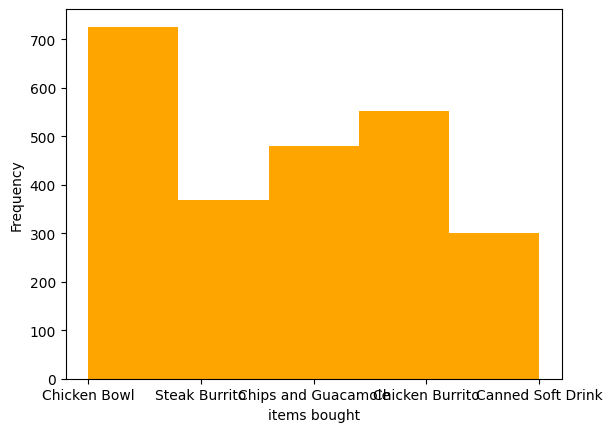

In [104]:
item_quantity = chipo_df.groupby(['item_name'])['quantity'].sum()
sorted = item_quantity.sort_values(ascending=False).head(5)
print(sorted)

top_5_df = chipo_df[chipo_df['item_name'].isin(sorted.index)]
top_5_df
plt.hist(top_5_df['item_name'], color ='orange', bins=5)  #bins -> how much to divide
plt.xlabel('items bought')
plt.ylabel('Frequency')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [105]:
chipo_df['item_price'] = chipo_df['item_price'].apply(lambda x: float(x.replace('$', '')))
orders_grouped = chipo_df.groupby('order_id').sum()


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

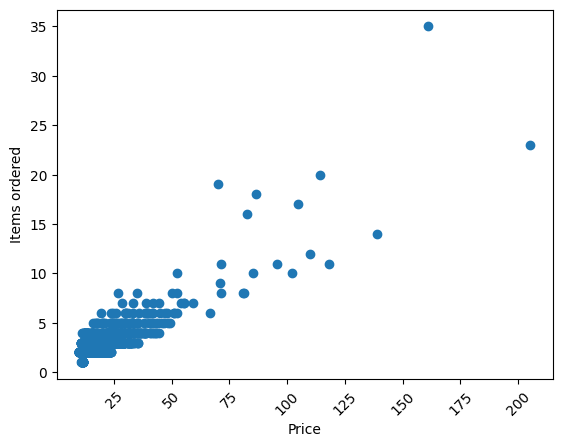

In [106]:
# x-axis -> price
# y-axis -> number of items ordered
plt.scatter(orders_grouped['item_price'], orders_grouped['quantity'],)
plt.xlabel("Price")  # label the x-axis
plt.ylabel("Items ordered")  #labe the y axis
plt.xticks(rotation=45) #rotate the labels

### Step 7. BONUS: Create a question and a graph to answer your own question.

Text(0, 0.5, 'Frequency')

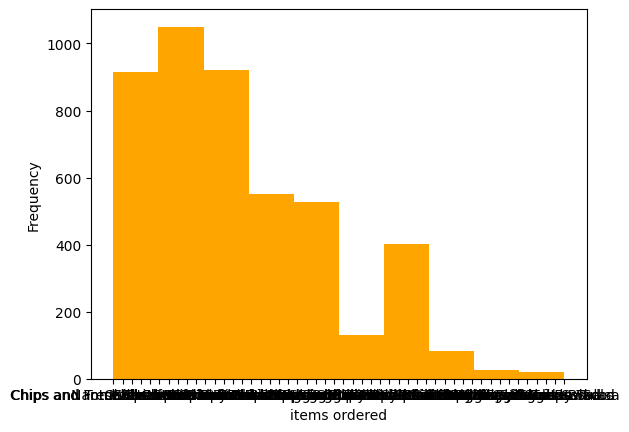

In [107]:
#  histogram showing frequency of items ordered
plt.hist(chipo_df['item_name'], color ='orange')  #bins -> how much to divide
plt.xlabel('items ordered')
plt.ylabel('Frequency')